<a href="https://colab.research.google.com/github/PawanSths/AI-agents/blob/main/Reflex_Based_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

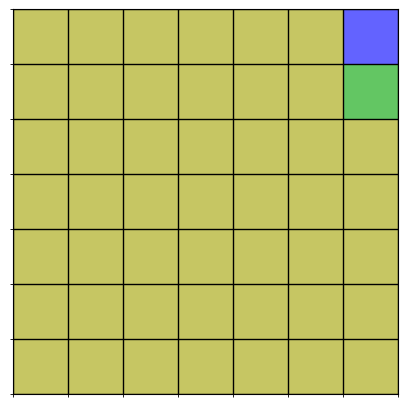

In [ ]:
#Reflex based agent
 #(Red	Tile still dirty,
 #Green	Tile clean (agent hasn’t been here)
 #Yellow	Tile clean & visited by agent
 #Blue	The agent’s current cell)


import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import random
from IPython.display import HTML

# Simulation parameters
GRID_SIZE    = 7
INTERVAL_MS  = 200   # milliseconds per frame
NUM_EPISODES = 3     # how many times to respawn & run

# Colors for visualization (RGB)
COLORS = {
    'dirty':   (1.00, 0.39, 0.39),
    'clean':   (0.39, 0.78, 0.39),
    'agent':   (0.39, 0.39, 1.00),
    'visited': (0.78, 0.78, 0.39),
}

class RandomWalkVacuumAgent:
    def __init__(self, size):
        self.size = size

    def reset(self):
        # New random dirt layout + random spawn
        self.grid    = np.random.randint(0, 2, (self.size, self.size))
        self.pos     = (random.randrange(self.size), random.randrange(self.size))
        self.visited = {self.pos}

    def neighbors(self, x, y):
        for dx, dy in [(-1,0),(1,0),(0,-1),(0,1)]:
            nx, ny = x+dx, y+dy
            if 0 <= nx < self.size and 0 <= ny < self.size:
                yield (nx, ny)

    def step(self):
        x, y = self.pos

        # 1) clean if dirty
        if self.grid[x, y] == 0:
            self.grid[x, y] = 1
        else:
            # 2) look for adjacent dirty
            adj = list(self.neighbors(x, y))
            dirty_adj = [p for p in adj if self.grid[p] == 0]
            if dirty_adj:
                nxt = random.choice(dirty_adj)
            else:
                # 3) then look for adjacent unvisited
                unvisited_adj = [p for p in adj if p not in self.visited]
                if unvisited_adj:
                    nxt = random.choice(unvisited_adj)
                else:
                    # 4) otherwise move randomly to any adjacent to keep exploring
                    nxt = random.choice(adj)

            self.pos = nxt
            self.visited.add(nxt)

        return True

    def run_episode(self):
        frames = []
        # keep stepping until **all** cells are clean and visited
        total_cells = self.size * self.size
        while not (np.all(self.grid==1) and len(self.visited)==total_cells):
            # record a frame BEFORE the step so you see the clean action
            frame = np.zeros((self.size, self.size, 3))
            for i in range(self.size):
                for j in range(self.size):
                    if (i, j) == self.pos:
                        frame[i, j] = COLORS['agent']
                    elif self.grid[i, j] == 0:
                        frame[i, j] = COLORS['dirty']
                    elif (i, j) in self.visited:
                        frame[i, j] = COLORS['visited']
                    else:
                        frame[i, j] = COLORS['clean']
            frames.append(frame)
            self.step()
        return frames

# Run multiple episodes and gather frames
agent = RandomWalkVacuumAgent(GRID_SIZE)
all_frames = []
for _ in range(NUM_EPISODES):
    agent.reset()
    all_frames.extend(agent.run_episode())

# Plot setup with clear grid lines
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(all_frames[0], interpolation='nearest')
ax.set_xticks(np.arange(-.5, GRID_SIZE, 1), minor=True)
ax.set_yticks(np.arange(-.5, GRID_SIZE, 1), minor=True)
ax.grid(which='minor', color='black', linestyle='-', linewidth=1)
ax.set_xticks([]); ax.set_yticks([])
ax.set_xlim(-0.5, GRID_SIZE - 0.5)
ax.set_ylim(GRID_SIZE - 0.5, -0.5)

def update(frame):
    im.set_array(frame)
    return [im]

ani = animation.FuncAnimation(
    fig, update, frames=all_frames,
    interval=INTERVAL_MS, blit=True
)

HTML(ani.to_jshtml())
